# 算法理论简介

# outline

1. 机器学习算法思想简介
2. 逻辑回归
3. 决策树
4. xgboost



## 机器学习算法思想简介

- 我们有样本的 $x,y$ 去训练出来一个模型，然后用这个模型得到预测 $\widehat{y}$。

- 我们定义一个指标去衡量我们预测的好坏——损失函数 $h(y,\widehat{y})$



## 逻辑回归

1. 预测的表达式

2. 损失函数为交叉熵损失函数
3. 利用梯度下降的方法得到最优参数



## 决策树

> 在涉及非结构化数据（图像、文本等）的预测问题中，人工神经网络显著优于所有其他算法或框架。但当涉及到中小型结构/表格数据时，基于决策树的算法现在被认为是最佳方法。而基于决策树算法中最惊艳的，非XGBoost莫属了。

- 普通的cart树，其中的参数：特征的选择及其切割点，叶节点的分类或者分数
- 基于信息增益，基尼指数等选择特征及其分裂点，构造决策树



## xgboost

- 结构：多个弱分类器（决策树）相加

- 方法：从损失函数出发推出一个类似信息增益的指标，进而择优选择特征及其分割点，构造决策树

---
# python实现

## 读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 读取上次加工完成的特征
data_path = './data/featured_data.csv'

data = pd.read_csv(data_path)
data = data.set_index('SK_ID_CURR')
data.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,...,MEAN_STATUS_ABOVE,STD_STATUS_2MON,STD_STATUS_4MON,STD_STATUS_12MON,STD_STATUS_24MON,STD_STATUS_36MON,STD_STATUS_ABOVE,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,1.0,0.0247,...,0.5,NaN,NaN,NaN,0.506623,0.474579,0.534523,0.0,45.0,72.0
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 根据目标变量的有无选出训练集和测试集
train = data[~data['TARGET'].isnull()]
test = data[data['TARGET'].isnull()]

print("【INFO】训练集行列数为：{0}，测试集行列数为：{1}".format(train.shape, test.shape))

【INFO】训练集行列数为：(10000, 295)，测试集行列数为：(1000, 295)


In [4]:
# 分开提取特征与标签
X = train.drop('TARGET', axis=1)
y = train['TARGET']

In [5]:
# 划分训练集合与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## xgboost的简单演示

### 模型的训练与预测

In [6]:
## 模型定义
model = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1,
                max_depth = 3, gamma=0.1, n_estimators = 50)

In [7]:
## 模型训练
model.fit(X_train,
          y_train,
          eval_set = [(X_train, y_train), (X_test,y_test)],
          eval_metric = "auc",
          early_stopping_rounds = 5)

[0]	validation_0-auc:0.730164	validation_1-auc:0.687533
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 5 rounds.
[1]	validation_0-auc:0.733308	validation_1-auc:0.688605
[2]	validation_0-auc:0.737356	validation_1-auc:0.690832
[3]	validation_0-auc:0.752755	validation_1-auc:0.712195
[4]	validation_0-auc:0.752837	validation_1-auc:0.710843
[5]	validation_0-auc:0.756812	validation_1-auc:0.713384
[6]	validation_0-auc:0.766989	validation_1-auc:0.716984
[7]	validation_0-auc:0.768651	validation_1-auc:0.716084
[8]	validation_0-auc:0.771747	validation_1-auc:0.718759
[9]	validation_0-auc:0.773717	validation_1-auc:0.716482
[10]	validation_0-auc:0.773563	validation_1-auc:0.716802
[11]	validation_0-auc:0.776654	validation_1-auc:0.721588
[12]	validation_0-auc:0.778981	validation_1-auc:0.722125
[13]	validation_0-auc:0.779387	validation_1-auc:0.722543
[14]	validation_0-auc:0.781284	validation_1-auc:0.724161

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.1,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [8]:
## 预测
y_pred = model.predict_proba(X_test)[:,1]

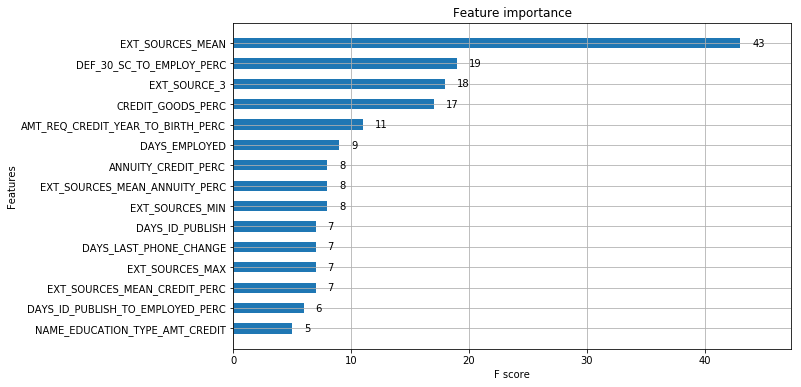

In [9]:
## 特征重要度
fig,ax = plt.subplots(figsize=(10,6))
xgb.plot_importance(model,
                height=0.5,
                ax=ax,
                max_num_features=15)
plt.show()

In [10]:
feature_importance = pd.Series(model.get_booster().get_score(importance_type='weight'))\
.sort_values(ascending=False).reset_index(name='importance')\
.rename(columns={'index':'feature'})

feature_importance.head(10)

,feature,importance
0,EXT_SOURCES_MEAN,43
1,DEF_30_SC_TO_EMPLOY_PERC,19
2,EXT_SOURCE_3,18
3,CREDIT_GOODS_PERC,17
4,AMT_REQ_CREDIT_YEAR_TO_BIRTH_PERC,11
5,DAYS_EMPLOYED,9
6,EXT_SOURCES_MIN,8
7,EXT_SOURCES_MEAN_ANNUITY_PERC,8
8,ANNUITY_CREDIT_PERC,8
9,EXT_SOURCES_MEAN_CREDIT_PERC,7


### 模型评估

1. 真正类率(True Postive Rate)TPR: TP/(TP+FN),代表分类器预测的正类中实际正实例占所有正实例的比例。

2. 负正类率(False Postive Rate)FPR: FP/(FP+TN)，代表分类器预测的正类中实际负实例占所有负实例的比例。

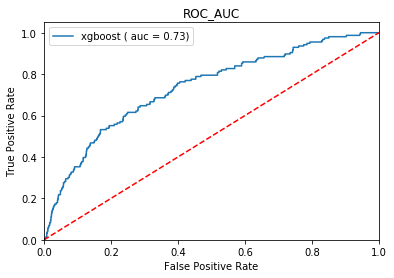

In [11]:
## 计算AUC
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='xgboost ( auc = %.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc="higher right")
plt.show()